# Régularisation et sélection de modèle

## Chargement et observation

**Question** Charger le jeu de données diabetes : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [3]:
import numpy as np

from sklearn import datasets 

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

**Question** Construire un `dataframe` à partir des données. Ajouter une colonne `target` pour la cible. Afficher les premières lignes du dataframe et afficher les statistiques descriptives.  

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [8]:
df['target']=diabetes.target

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


**Question** Dans la documentation on trouve *Note that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)*. Vérifiez ces deux propriétés.

In [11]:
df.iloc[:,:-1].mean().sum()

-1.6687225460794474e-15

In [12]:
(df.iloc[:,:-1]**2).sum()

age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

**Question** Tracez le graphe donnant la valeur de la cible en fonction de l'âge 

In [13]:
import seaborn as sns
sns.set()

/home/zhou/anaconda3/envs/liste/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

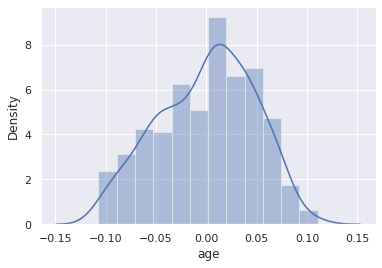

In [14]:
sns.distplot(df['age'])

## Un premier essai

**Question** Utiliser `train_test_split` de `sklearn.model_selection` pour découper aléatoirement le jeu de données en gardant 1/3 pour l'échantillon de test.  

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.33,random_state=42)

In [16]:
X_train, X_test, y_train, y_test

(array([[ 0.0090156 , -0.04464164, -0.03099563, ..., -0.00259226,
          0.00943641,  0.01134862],
        [-0.00188202, -0.04464164,  0.05415152, ...,  0.08486339,
          0.08449528,  0.04862759],
        [ 0.0090156 ,  0.05068012, -0.00512814, ...,  0.07120998,
          0.03953988,  0.01963284],
        ...,
        [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
         -0.01090444, -0.0010777 ],
        [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
         -0.03845911, -0.03835666],
        [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
         -0.00514531, -0.0010777 ]]),
 array([[ 0.04534098, -0.04464164, -0.00620595, ...,  0.03430886,
          0.03243323, -0.0052198 ],
        [ 0.09256398, -0.04464164,  0.03690653, ..., -0.03949338,
         -0.02251217, -0.02178823],
        [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
          0.08449528, -0.01764613],
        ...,
        [-0.07453279, -0.04464164, -0.046085  , ..., -

**Question** Vérifier que vous pouvez le faire soit sur les arrays numpy issus de la lecture réalisée à l'aide de `load_diabetes` ou du dataframe construit précédemment. 

In [17]:
df_train,df_test = train_test_split(df,test_size=0.33,random_state = 42)

In [18]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

In [19]:
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

In [20]:
X_train, X_test, y_train, y_test

(array([[ 0.0090156 , -0.04464164, -0.03099563, ..., -0.00259226,
          0.00943641,  0.01134862],
        [-0.00188202, -0.04464164,  0.05415152, ...,  0.08486339,
          0.08449528,  0.04862759],
        [ 0.0090156 ,  0.05068012, -0.00512814, ...,  0.07120998,
          0.03953988,  0.01963284],
        ...,
        [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
         -0.01090444, -0.0010777 ],
        [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
         -0.03845911, -0.03835666],
        [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
         -0.00514531, -0.0010777 ]]),
 array([[ 0.04534098, -0.04464164, -0.00620595, ...,  0.03430886,
          0.03243323, -0.0052198 ],
        [ 0.09256398, -0.04464164,  0.03690653, ..., -0.03949338,
         -0.02251217, -0.02178823],
        [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
          0.08449528, -0.01764613],
        ...,
        [-0.07453279, -0.04464164, -0.046085  , ..., -

Dans tous les cas, construisez à la fin 4 arrays numpy `X_train`, `X_test`, `y_train`, `y_test`.

**Question** Regardez la documentation de `Ridge` dans sklearn. Quelle est la fonction objectif ? Quelle est sa dérivée sous forme matricielle ? Pour quelle valeur de $w$ s'annule-t-elle ? 

*Votre réponse*

**Question** Construire deux modèles de régression avec `sklearn`. Utilisez les deux méthodes `LinearRegression` et `Ridge`. Dans un premier temps on garde la valeur de `alpha` à 1. Appelez-les `lr` et `ridge`.

In [21]:
from sklearn import linear_model

In [22]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

**Question** Calculez les prédictions et les scores dans chacun des cas sur les données de test.

In [25]:
lr_predictions= lr.predict(X_test)

In [26]:
lr.score(X_test, y_test)

0.5103954261351442

In [27]:
ridge_predictions= ridge.predict(X_test)

In [28]:
ridge.score(X_test, y_test)

0.44451194464421595

**Question** Tracer sur un même graphique les points en bleu pour ridge  et en rouge pour lr représentant en abscisse les valeurs en test et en ordonnée les valeurs prédites.

![ridge contre lr](./ridge_contre_lr.png)


In [29]:
import matplotlib.pyplot as plt  # matplotlib pour trace rdes graphiques
%matplotlib inline

Text(0, 0.5, 'Prediction')

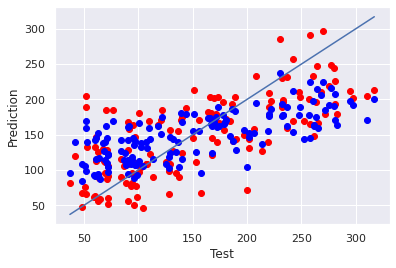

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test,lr_predictions,color = 'red')
ax.scatter(y_test,ridge_predictions,color= 'blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
ax.set_xlabel('Test')
ax.set_ylabel('Prediction')

## Méthodologie de sélection de modèles

**Question** On a donc une estimation de l'erreur en généralisation... Mais peut-on dire à l'issue de ce qu'on observe sur le test que l'un est meilleur que l'autre et qu'on devrait prendre la méthode qui se comporte mieux sur l'échantillon test pour la mettre en production ?

*Aide* Pour vous aider à répondre, considérez que vous avez 1000 méthodes de régression et non plus deux.

*votre réponse* :


Mais on a fixé un paramètre $\alpha$ par défaut pour la ridge régression et comment peut-on tester si d'autres valeurs marcheraient mieux ? Il faut tester de nombreuses valeurs et on veut avoir la meilleure valeur pour $\alpha$. Comment procéder ? 

Pour cela, **il faut découper l'échantillon de données train initial en une partie apprentissage (train) et une partie de validation (valid)**. On estime l'erreur sur la partie validation. 

On a alors 3 ensembles train/validation/test (ou encore selon d'autres terminologies train/development/test), celui du milieu servant à régler les valeurs des (hyper)paramètres de l'algorithme d'apprentissage (pas les paramètres de la fonction de régression): c'est l'**hyperparameter tuning**.

## Validation croisée

Par contre, on commence à avoir des ensembles un peu petits... L'estimation sur un petit échantillon valid risque d'être problématique. On utilise alors une méthode dite de la validation croisée pour répéter plusieurs fois ce découpage train/valid et moyenner les résultats.

Construisons d'abord cela à la main... Nous allons procéder en manipulant les indices et non les données.

**Question** Prenons par exemple une liste d'indices 

    indices = np.arange(10)


Regardez maintenant comment fonctionne les méthodes `random.shuffle`, `copy`, `array_split`, `pop` et `concatenate` de `np`. Faites des petits essais avec `indices` pour bien comprendre le fonctionnement.   

In [31]:
import random
indices = np.arange(10)
a = np.concatenate((indices,indices),axis=0)
b = np.copy(indices)
c = np.delete(indices,1)
d = np.array_split(indices,3)
e = random.shuffle(indices)
a,b,c,d,e,indices

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 2, 3, 4, 5, 6, 7, 8, 9]),
 [array([2, 3, 8, 7]), array([5, 0, 4]), array([1, 9, 6])],
 None,
 array([2, 3, 8, 7, 5, 0, 4, 1, 9, 6]))

Si on découpe l'ensemble des indices réordonnés aléatoirement du train en trois parties, on obtient trois parties et on peut construire successivement des échantillons à partir du train qui seront : 

- les indices des parties 1 et 2 pour construire un classeur et 3 pour évaluer son score 
- les indices des parties 1 et 3 pour construire un classeur et 2 pour évaluer son score 
- les indices des parties 2 et 3 pour construire un classeur et 1 pour évaluer son score 

On peut alors calculer une estimation de l'erreur en moyennant les 3 scores correspondant aux trois étapes ci-dessus. On a alors réalisé l'algorithme de validation croisée. On peut bien-sûr généraliser sur autant de parties qu'on veut! 

**Question** Réaliser cet algorithme dans une fonction `my_fold` dont les paramètres sont un échantillon `X`, des classes `y`, un nombre de parties `k` et une méthode de régression `reg`. L'essayer avec `ridge`.

In [32]:
def my_fold(X,y,k,reg):
    random.Random(42).shuffle(X)
    random.Random(42).shuffle(y)
    NX = np.array_split(X,k)
    ny = np.array_split(y,k)
    
    
    
    
    score = (score1+score2+score3)/3
    return score
    
    

### Validation croisée dans sklearn

**Question** 
Regardez et importez [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) puis créez un objet nommé `k_fold` à 3 parties. Inspirez-vous de la page de description de [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) pour cette partie.

**Question** Construire une liste contenant les scores de `ridge`.  

Une manière encore plus directe est d'utiliser la fonction [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). 

**Question** Importez la fonction et avec une boucle, recalculer les erreurs par 3-validation de `ridge` pour les valeurs de `alpha` suivantes 0.01, 0.1, 1, 10, 100.

## Encore plus simple...

**Question** : Refaites la même chose avec [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)...